# **TUGAS**

Noted :
Target Besok Sore Jam 3

# 1. Pengumpulan data

1. Gunakan function `generate_random_names` untuk membuat **1000** nama secara acak (Ok)
2. Dari nama-nama yang telah dibuat, dapatkan informasi sebagai berikut
    - gender : jenis kelamin (m/f)
    - total_word : jumlah kata dalam nama
    - total_char : jumlah karakter dalam nama (termasuk spasi)
    - first_name : nama depan
    - mid_name : nama tengah (isi `None` jika tidak memiliki nama tengah)
    - last_name : nama belakang (isi `None` jika tidak memiliki nama belakang)
3. Urutkan nama berdasarkan urutan alfabetis dari a ke z ( Ok )
4. Simpan data-data berikut kedalam csv dengan nama file `names.csv` (ok)
5. Contoh hasil penyimpanan data bisa dilihat pada file `sample_names.csv` (ok)

In [1]:
import requests
import random
import re

def generate_random_names():
    def randomize_params():
        # initiate params
        params = {
            'gender': 'm' if random.random() < 0.67 else 'f',
            'number': 3 if random.random() < 0.75 else 2 if random.random() < 0.95 else 1,
            'sets': random.randint(1,5),
            'surname': '',
            'usage_ins': 2
        }

        return params

    def request_to_api(params:dict):
        # send request
        response = requests.get('https://www.behindthename.com/random/random.php', params=params)
        if response.status_code != 200:
            return None
        
        return response
    
    def parse_response(response):
        # decode html page to string
        result_html = response.content.decode()

        # get results division starting index
        divs_start = [i.start() for i in re.finditer('<div class="random-results">', result_html)]

        # iterate all results division
        result_names = []
        for div_start in divs_start:
            # get result division
            div_end = result_html[div_start:].find('</div>')
            division = result_html[div_start:div_start+div_end]

            # split result per word
            random_results = division.split('</a>')

            # get clean result
            random_names = []
            for random_result in random_results[:-1]:
                random_name = random_result[random_result.find('class="plain">'):].replace('class="plain">','')
                random_names.append(random_name)
            result_name = ' '.join(random_names)

            # add result
            result_names.append(result_name)

        return result_names
    
    params = randomize_params()
    response = request_to_api(params)
    results = parse_response(response)

    return [{'name':result, 'gender':params['gender']} for result in results]

In [2]:
import pandas as pd
import numpy as np

In [3]:
n = range(1000+1)
j = []
for a in n:
    j.extend(generate_random_names())
    nam = j 

In [4]:
df = pd.DataFrame(nam)
df["total_word"] = df['name'].str.split().str.len()
df["total_char"] = df['name'].str.len()
df["first_name"] = df['name'].str.split().str[0]
df["mid_name"] = df['name'].str.split().str[1]
df["last_name"] = df['name'].str.split().str[2].fillna(np.nan)



display(df)

,name,gender,total_word,total_char,first_name,mid_name,last_name
0,Bima Aditya Slamet,m,3,18,Bima,Aditya,Slamet
1,Usman Faisal Cahya,m,3,18,Usman,Faisal,Cahya
2,Wahyu Ilham,m,2,11,Wahyu,Ilham,NaN
3,Dwi Wira,m,2,8,Dwi,Wira,NaN
4,Wahyu Iman,m,2,10,Wahyu,Iman,NaN
...,...,...,...,...,...,...,...
1010,Qdcqsts Zqdu,m,2,12,Qdcqsts,Zqdu,NaN
1011,Usokbe Gomxoc,m,2,13,Usokbe,Gomxoc,NaN
1012,Aempjah Ebfmvju,f,2,15,Aempjah,Ebfmvju,NaN
1013,Mjesdp Ecdih,m,2,12,Mjesdp,Ecdih,NaN


In [5]:
df.sort_values(by= ['name'], ascending= True, inplace= True)
display(df)
# print(final_df)

,name,gender,total_word,total_char,first_name,mid_name,last_name
487,Abgpws Unjy,m,2,11,Abgpws,Unjy,NaN
310,Abptu Xmapbed,f,2,13,Abptu,Xmapbed,NaN
44,Abtna Pcgu,m,2,10,Abtna,Pcgu,NaN
627,Acq Voiv,f,2,8,Acq,Voiv,NaN
731,Acsg Dnrk,m,2,9,Acsg,Dnrk,NaN
...,...,...,...,...,...,...,...
509,Zxv Xtuss,m,2,9,Zxv,Xtuss,NaN
320,Zyjr Cqdyrdf,f,2,12,Zyjr,Cqdyrdf,NaN
852,Zzb Zavqlj,f,2,10,Zzb,Zavqlj,NaN
867,Zzemb Swey,f,2,10,Zzemb,Swey,NaN


In [6]:
# final_df.drop(columns=0,inplace= True)
# df.drop(df.columns[[0]], axis=1, inplace=True)
df.reset_index(drop= True, inplace= True)
display(df)

,name,gender,total_word,total_char,first_name,mid_name,last_name
0,Abgpws Unjy,m,2,11,Abgpws,Unjy,NaN
1,Abptu Xmapbed,f,2,13,Abptu,Xmapbed,NaN
2,Abtna Pcgu,m,2,10,Abtna,Pcgu,NaN
3,Acq Voiv,f,2,8,Acq,Voiv,NaN
4,Acsg Dnrk,m,2,9,Acsg,Dnrk,NaN
...,...,...,...,...,...,...,...
1010,Zxv Xtuss,m,2,9,Zxv,Xtuss,NaN
1011,Zyjr Cqdyrdf,f,2,12,Zyjr,Cqdyrdf,NaN
1012,Zzb Zavqlj,f,2,10,Zzb,Zavqlj,NaN
1013,Zzemb Swey,f,2,10,Zzemb,Swey,NaN


In [7]:
# # df_reset.drop("-", axis=1, inplace= True)
# df_reset.fillna(np.nan,inplace=True) 
display(df)
df.to_csv("names_new.csv", index= False)

,name,gender,total_word,total_char,first_name,mid_name,last_name
0,Abgpws Unjy,m,2,11,Abgpws,Unjy,NaN
1,Abptu Xmapbed,f,2,13,Abptu,Xmapbed,NaN
2,Abtna Pcgu,m,2,10,Abtna,Pcgu,NaN
3,Acq Voiv,f,2,8,Acq,Voiv,NaN
4,Acsg Dnrk,m,2,9,Acsg,Dnrk,NaN
...,...,...,...,...,...,...,...
1010,Zxv Xtuss,m,2,9,Zxv,Xtuss,NaN
1011,Zyjr Cqdyrdf,f,2,12,Zyjr,Cqdyrdf,NaN
1012,Zzb Zavqlj,f,2,10,Zzb,Zavqlj,NaN
1013,Zzemb Swey,f,2,10,Zzemb,Swey,NaN


# 2. Pengolahan data

1. Buka data yang sudah dikumpulan pada soal nomor 1
2. Berdasarkan data tersebut, cari tahu:
    - nama terpanjang
    - nama terpendek
    - nama terpopuler untuk laki-laki (rangkaian nama, misal : Amir Mahmud Tirto)
    - nama terpopuler untuk laki-laki (satu kata : Mahmud)
    - nama terpopuler untuk perempuan (rangkaian nama, misal : Annisa Sri Putri)
    - nama terpopuler untuk perempuan (satu kata : Putri)
    - huruf pertama yang paling sering dipakai dalam nama
3. Buat grafik tentang:
    - perbandingan jumlah laki-laki dan perempuan
    - perbandingan nama yang memiliki satu, dua, dan tiga kata
    - jumlah nama terhadap huruf pertamanya

In [1]:
import pandas as pd
import numpy as np

In [10]:
df = pd.read_csv("names_new.csv")

In [11]:
# Nama Terpanjang
df.sort_values(by= ['total_char'], ascending= False, inplace= True)
display("Nama Terpanjang" ,df)

'Nama Terpanjang'

,name,gender,total_word,total_char,first_name,mid_name,last_name
748,Sulaiman Aditya Muhammad,m,3,24,Sulaiman,Aditya,Muhammad
723,Setiawan Guntur Hidayat,m,3,23,Setiawan,Guntur,Hidayat
73,Burhan Saiful Taufik,m,3,20,Burhan,Saiful,Taufik
296,Ibrahim Ridwan Bima,m,3,19,Ibrahim,Ridwan,Bima
11,Ahmad Sulaiman Raja,m,3,19,Ahmad,Sulaiman,Raja
...,...,...,...,...,...,...,...
272,Hik Vns,f,2,7,Hik,Vns,NaN
924,Xtj Fxi,m,2,7,Xtj,Fxi,NaN
448,Log Eyx,f,2,7,Log,Eyx,NaN
276,Hjw Whx,m,2,7,Hjw,Whx,NaN


In [13]:
# Nama Terpendek
df.sort_values(by= ['total_char'], ascending= True, inplace= True)
display("Nama Terpendek" ,df)

'Nama Terpendek'

,name,gender,total_word,total_char,first_name,mid_name,last_name
663,Qwv Ino,m,2,7,Qwv,Ino,NaN
346,Jdu Qzx,f,2,7,Jdu,Qzx,NaN
448,Log Eyx,f,2,7,Log,Eyx,NaN
272,Hik Vns,f,2,7,Hik,Vns,NaN
930,Yae Bqd,m,2,7,Yae,Bqd,NaN
...,...,...,...,...,...,...,...
702,Ruslan Putra Akhmad,m,3,19,Ruslan,Putra,Akhmad
11,Ahmad Sulaiman Raja,m,3,19,Ahmad,Sulaiman,Raja
73,Burhan Saiful Taufik,m,3,20,Burhan,Saiful,Taufik
723,Setiawan Guntur Hidayat,m,3,23,Setiawan,Guntur,Hidayat


In [15]:
# Nama Popular Laki-Laki Rangkaian Nama
df[df['name'] == 'Setiawan Guntur Hidayat']

,name,gender,total_word,total_char,first_name,mid_name,last_name
723,Setiawan Guntur Hidayat,m,3,23,Setiawan,Guntur,Hidayat


In [42]:
# Nama Popular Laki-Laki Satu Kata
df[df['name'].str.split().str.get(0) == 'Wahyu']

,name,gender,total_word,total_char,first_name,mid_name,last_name
859,Wahyu Iman,m,2,10,Wahyu,Iman,NaN
858,Wahyu Ilham,m,2,11,Wahyu,Ilham,NaN


In [17]:
# Nama Popular Perempuan Rangkaian Nama
df[df['name'] == 'Hadijah Cinta']

,name,gender,total_word,total_char,first_name,mid_name,last_name
261,Hadijah Cinta,f,2,13,Hadijah,Cinta,NaN


In [39]:
# Nama Popular perempuan Satu Kata
df[df['name'].str.split().str.get(0) == 'Hadijah']

,name,gender,total_word,total_char,first_name,mid_name,last_name
261,Hadijah Cinta,f,2,13,Hadijah,Cinta,NaN
262,Hadijah Sri Indah,f,3,17,Hadijah,Sri,Indah


In [19]:
#  Huruf pertama yang paling sering dipakai dalam nama, Cara 1
data_1 = df[df['name'].str.get(0) == "A"]
data_1 = data_1.reset_index()
data_1

,index,name,gender,total_word,total_char,first_name,mid_name,last_name
0,21,Amu Izx,m,2,7,Amu,Izx,NaN
1,13,Aidd Erc,m,2,8,Aidd,Erc,NaN
2,31,Axg Mntj,m,2,8,Axg,Mntj,NaN
3,3,Acq Voiv,f,2,8,Acq,Voiv,NaN
4,15,Akpp Qre,m,2,8,Akpp,Qre,NaN
5,20,Amlq Mmnx,f,2,9,Amlq,Mmnx,NaN
6,4,Acsg Dnrk,m,2,9,Acsg,Dnrk,NaN
7,19,Amg Bycpq,m,2,9,Amg,Bycpq,NaN
8,30,Awqp Gfok,f,2,9,Awqp,Gfok,NaN
9,29,Awd Yofqom,m,2,10,Awd,Yofqom,NaN


In [52]:
#  Huruf pertama yang paling sering dipakai dalam nama, Cara 2
df['name'].mode()
# dnams= df['name'].value_counts()
# display(dnams)

0         Abgpws Unjy
1       Abptu Xmapbed
2          Abtna Pcgu
3            Acq Voiv
4           Acsg Dnrk
            ...      
1010        Zxv Xtuss
1011     Zyjr Cqdyrdf
1012       Zzb Zavqlj
1013       Zzemb Swey
1014    Zztbxk Yvnwln
Name: name, Length: 1015, dtype: object

In [21]:
import matplotlib.pyplot as plt

In [22]:
df.groupby('gender').first()
male_count = df[df.gender == 'm'].gender.count()
female_count = df[df.gender == 'f'].gender.count()
display(male_count)
display(female_count)

664

351

<Axes: >

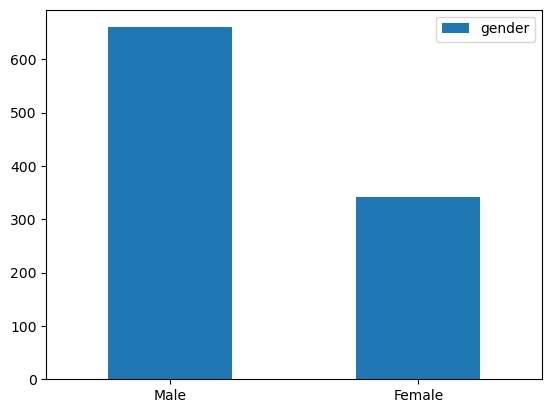

In [23]:
# Gender Graphic
plotdata = pd.DataFrame(
    {"gender": [660, 341]}, 
    index=["Male", "Female"])
# Plot a bar chart
plotdata.plot(kind="bar", rot= 0)

<Axes: title={'center': 'Gender'}, xlabel='gender'>

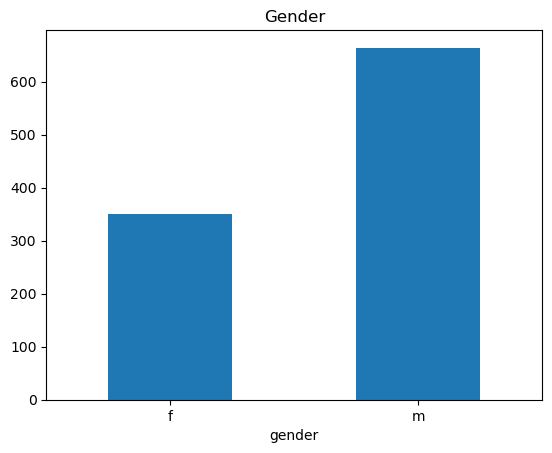

In [24]:
# Cara Kedua Gender
df.groupby('gender').size().plot(kind='bar', title = 'Gender', rot = 0)

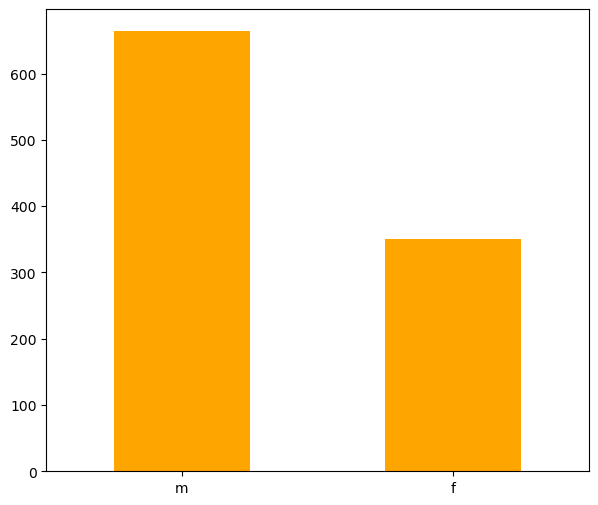

m    664
f    351
Name: gender, dtype: int64


In [25]:
#  Cara Ketiga 

data_gender = df['gender'].str[0].value_counts()
plt.figure(figsize=(7,6))
data_gender.plot(kind='bar', rot=0, color='orange')
plt.show()

print(data_gender)

In [26]:
# 
df.groupby('total_word').first()
oneword_count = df[df.total_word == 1].total_word.count()
twoword_count = df[df.total_word == 2].total_word.count()
threeword_count = df[df.total_word == 3].total_word.count()
display(oneword_count, twoword_count, threeword_count)

0

1001

14

<Axes: >

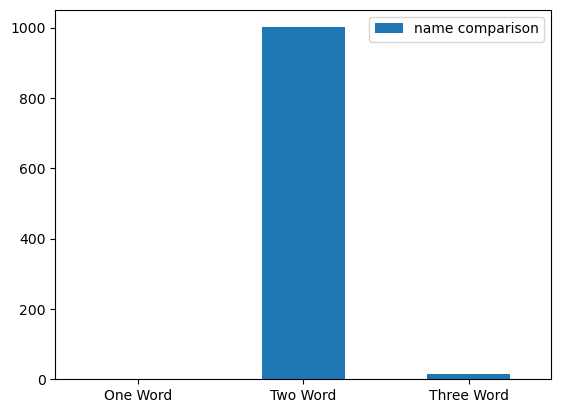

In [28]:
# One,Two,Three Word Count Graphic
plotdata = pd.DataFrame(
    {"name comparison": [0, 1001, 14]}, 
    index=["One Word", "Two Word", "Three Word"])
# Plot a bar chart
plotdata.plot(kind="bar", rot= 0)

<Axes: title={'center': 'Name Comparison'}, xlabel='total_word'>

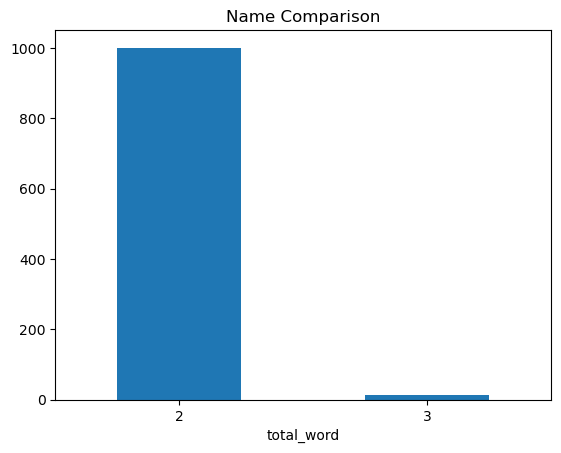

In [29]:
# Cara Kedua One, Two, Three Word Count
df.groupby('total_word').size().plot(kind='bar', title = 'Name Comparison', rot = 0)

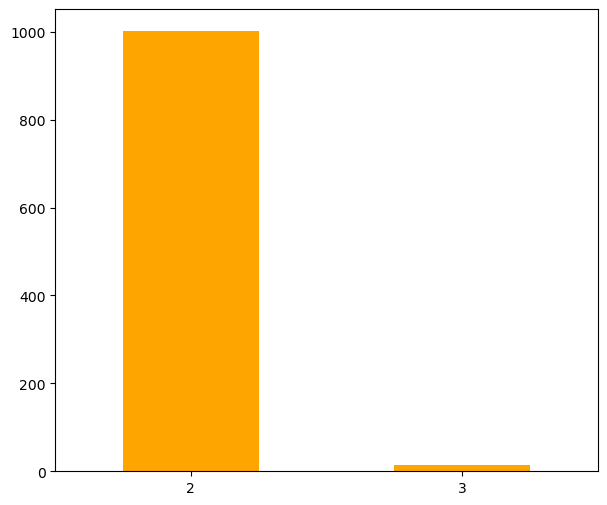

2    1001
3      14
Name: total_word, dtype: int64


In [30]:
# Cara Ketiga One, Two, Three Word Count
data_word_count = df['total_word'].value_counts()
plt.figure(figsize=(7,6))
data_word_count.plot(kind='bar', rot=0, color='orange')
plt.show()

print(data_word_count)

In [37]:
# # Cek apakah benar kode yang diambil berdasarkan huruf untuk menghitung jumlah nama
# a_count = df[df['name'].str.get(0) == "Z"]
# display(a_count)

In [36]:
# # Jumlah Nama Terhadap Huruf Pertamanya
# data_4= df.groupby('name').first()
# a_count = df[df['name'].str.get(0) == "A"].name.count()
# b_count = df[df['name'].str.get(0) == "B"].name.count()
# c_count = df[df['name'].str.get(0) == "C"].name.count()
# d_count = df[df['name'].str.get(0) == "D"].name.count()
# e_count = df[df['name'].str.get(0) == "E"].name.count()
# f_count = df[df['name'].str.get(0) == "F"].name.count()
# g_count = df[df['name'].str.get(0) == "G"].name.count()
# h_count = df[df['name'].str.get(0) == "H"].name.count()
# i_count = df[df['name'].str.get(0) == "I"].name.count()
# j_count = df[df['name'].str.get(0) == "J"].name.count()
# k_count = df[df['name'].str.get(0) == "K"].name.count()
# l_count = df[df['name'].str.get(0) == "L"].name.count()
# m_count = df[df['name'].str.get(0) == "M"].name.count()
# n_count = df[df['name'].str.get(0) == "N"].name.count()
# o_count = df[df['name'].str.get(0) == "O"].name.count()
# p_count = df[df['name'].str.get(0) == "P"].name.count()
# q_count = df[df['name'].str.get(0) == "Q"].name.count()
# r_count = df[df['name'].str.get(0) == "R"].name.count()
# s_count = df[df['name'].str.get(0) == "S"].name.count()
# t_count = df[df['name'].str.get(0) == "T"].name.count()
# u_count = df[df['name'].str.get(0) == "U"].name.count()
# v_count = df[df['name'].str.get(0) == "V"].name.count()
# w_count = df[df['name'].str.get(0) == "W"].name.count()
# x_count = df[df['name'].str.get(0) == "X"].name.count()
# y_count = df[df['name'].str.get(0) == "Y"].name.count()
# z_count = df[df['name'].str.get(0) == "Z"].name.count()
# # display(a_count,b_count,c_count,d_count,e_count,f_count,g_count, h_count,i)
# print(data_4, "A Count", a_count, "B Count", b_count, "C Count", c_count, 
#         "D Count", d_count, "E Count", e_count, "F Count", f_count, "G Count", g_count,
#         "H Count", h_count, "I Count", i_count, "J count", j_count, "K count", k_count,
#         "L Count", l_count, "M Count", m_count, "N Count", n_count, "O Count", o_count,
#         "P Count", p_count, "Q Count", q_count, "R Count", r_count, "S Count", s_count,
#         "T Count", t_count, "U Count", u_count, "V Count", v_count, "W Count", w_count,
#         "X Count", x_count, "Y Count", y_count, "Z Count", z_count)

In [35]:
# # Check apakah benar data yang dihitung berjumlah sebesar 1001
# total_count = a_count + b_count + c_count + d_count + e_count + f_count + g_count + h_count + i_count + j_count + k_count + l_count + m_count + n_count + o_count + p_count + q_count + r_count + s_count + t_count + u_count + v_count + w_count + x_count + y_count + z_count
# print(total_count)

In [34]:
# # Cara Pertama Grafik Jumlah nama berdasarkan huruf pada dataframe
# plotdata = pd.DataFrame(
#     {"number of names against letters": [40, 45, 35, 34, 43, 31, 39, 37, 47, 42, 45, 41, 38, 42, 31, 36, 38, 42, 33, 38, 38, 31, 38, 36, 38, 43]}, 
#     index=["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"])

# # Plot a bar chart
# plotdata.plot(
#     kind= 'bar', layout=(2,10), rot= 0, color= ('g')
# )

# plotdata
# print(" Selesai ")

In [33]:
# # Cara Kedua Grafik Jumlah nama berdasarkan huruf pada dataframe
# plotdata = pd.DataFrame(
#     {"number of names against letters": [40, 45, 35, 34, 43, 31, 39, 37, 47, 42, 45, 41, 38, 42, 31, 36, 38, 42, 33, 38, 38, 31, 38, 36, 38, 43]}, 
#     index=["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"])

# # Plot a bar chart
# plotdata.sort_values(by="number of names against letters", ascending= False).plot(
#     kind= 'bar', layout=(2,10), rot= 0, color= ('g')
# )

# plotdata
# print(" Selesai ")

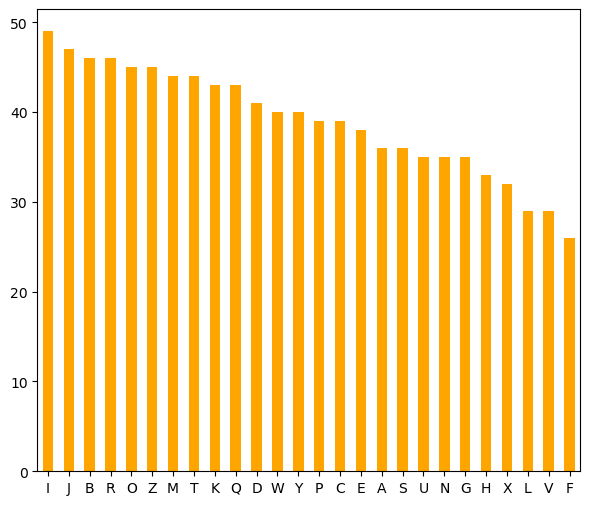

I    49
J    47
B    46
R    46
O    45
Z    45
M    44
T    44
K    43
Q    43
D    41
W    40
Y    40
P    39
C    39
E    38
A    36
S    36
U    35
N    35
G    35
H    33
X    32
L    29
V    29
F    26
Name: name, dtype: int64


In [32]:
data_names_letters = df['name'].str[0].value_counts()
plt.figure(figsize=(7,6))
data_names_letters.plot(kind='bar', rot=0, color='orange')
plt.show()

print(data_names_letters)